In [1]:
# -*- coding: utf-8 -*-
"""
Created on Dec 14 04:04:03 2023

@author: Ugochukwu O. Ugwu
"""
__email__ = "uugobinnah@gmail.com"

#!/usr/bin/tufts_env python
"""
--------------------------------------------------------------------------
Created November 20, 2023 for Deep-Py library
"""

%reset
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
import pandas as pd
from tensorflow.keras.utils import to_categorical
import h5py

import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
import numpy as np
import os
import napari
import sys
from combination import unpatchete,compute_metrics,plot_metric,plot_base_tri, open_and_correct_image,process_matfiles,make_initial_masks,make_initial_masks,loading_train_val_test_data

Nothing done.


c:\Users\uugob\miniconda3\envs\tufts_env\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


Load a desired mat files

In [5]:
image, image_shape = process_matfiles('V:/Archive/Maria/New_Data_for_ML/Control123_Day3_noTreat.mat')
patch_size = 256
reconstructed_image = unpatchete(image, image_shape, patch_size)

Load the previously trained baseline models to predict initial masks

In [6]:
initial_masks = make_initial_masks(image, image_shape, patch_size,reconstructed_image)

14/14 [==============================] - 30s 2s/step


Load the training, validation and test images

In [2]:
X_val, y_val = loading_train_val_test_data('val')

Load the trained model

In [3]:
model_step2 = load_model('Z:/DeyPlay/mono_2024c_enameta_pretrained_neu_alzh_v0.hdf5',compile=False) 
y_pred_val = model_step2.predict(X_val.clip(0.001,0.1)) + model_step2.predict(X_val) 
compute_metrics(y_val,y_pred_val,1,0.5,'Metrics for Neuronal Segmentation')

36/36 [==============================] - 322s 9s/step
  Metrics for Neuronal Segmentation
╒══════════════════════════╤══════════╕
│          Metric          │  Value   │
╞══════════════════════════╪══════════╡
│ Recall (Sensitivity/TPR) │ 0.941878 │
├──────────────────────────┼──────────┤
│        Precision         │ 0.649102 │
├──────────────────────────┼──────────┤
│        F_1 Score         │ 0.768551 │
╘══════════════════════════╧══════════╛


Clean the predicted masks using a jupyter notebook napari interface

In [6]:
from combination import unpatchete,compute_metrics,plot_metric,plot_base_tri, open_and_correct_image,process_matfiles,make_initial_masks,make_initial_masks,loading_train_val_test_data
the = "Illustrating the Performance of 2D YNET on Alzheimer's Data (3rd Round (Tile 2), May 2024)"
custom_name = "corrected_alzh_images_val"
plot_base_tri(X_val, y_val[:,:,:,1],y_pred_val[:,:,:,1], 0.08, the,custom_name)

#np.save('Z:/DeyPlay/Tile_masks/maskitizy/HSVinfec1_Day3_noTreat_1.npy',ypred[:,:,:,1]>0.08)

Output()

In [10]:
stack_of_masks = y_pred_val[:,:,:,1]>0.08
save_directory = 'Z:/DeyPlay/Tile_masks/' 
default_filename = 'corrected_alzh_masks_val.npy'  
open_and_correct_image(stack_of_masks, save_directory, default_filename)

Load and visualize the cleaned masks

In [8]:
y_pred_val_cleaned = to_categorical(np.load('Z:/DeyPlay/Tile_masks/corrected_alzh_masks_val.npy'),2)

Visualize all masks

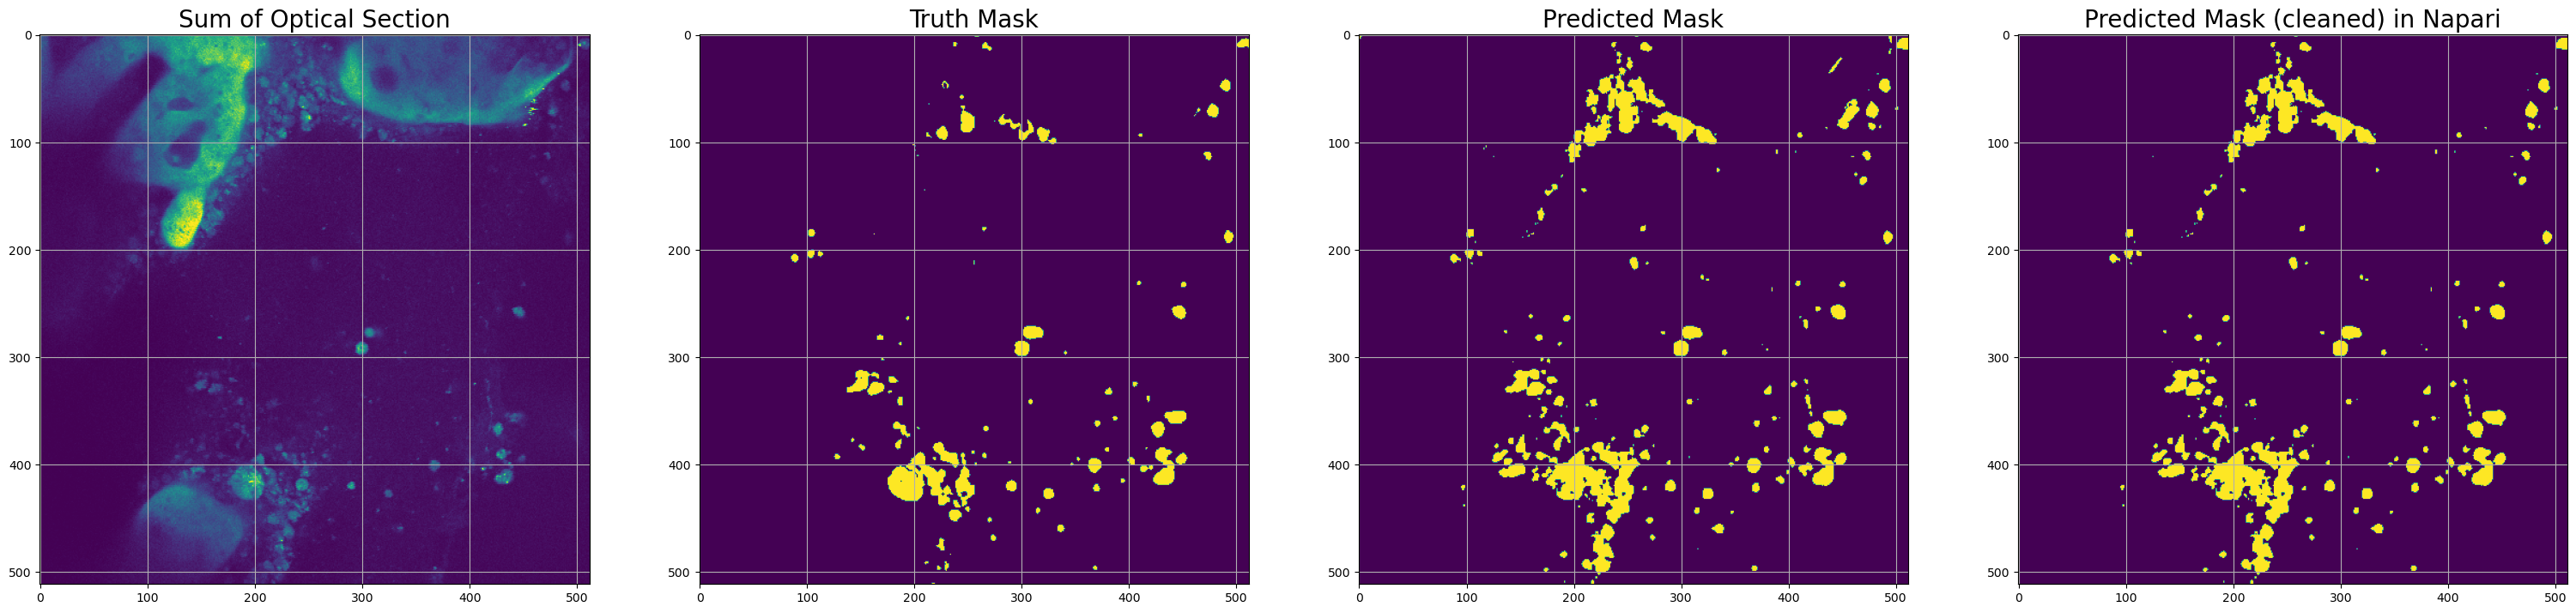

In [11]:
i = 120
plt.figure(figsize=(38, 39))
images = np.sum(X_val[i, :, :,:],axis=2)

plt.subplot(1, 4, 1)
plt.imshow(images.clip(0.001,0.5))
plt.grid('on')
plt.title('Sum of Optical Section',fontsize=20)

plt.subplot(1, 4, 2)
plt.imshow(y_val[i, :, :,1])
plt.grid('on')
plt.title('Truth Mask',fontsize=20)

plt.subplot(1, 4, 3)
plt.imshow(y_pred_val[i, :, :,1]>0.08)
plt.grid('on')
plt.title('Predicted Mask',fontsize=20)

plt.subplot(1, 4, 4)
plt.imshow(y_pred_val_cleaned[i, :, :,1]>0.08)
plt.grid('on')
plt.title('Predicted Mask (cleaned) in Napari',fontsize=20)

plt.show()

Step 2: Predict and Visualize the next set of masks

In [189]:
model_nbs = load_model('Z:/DeyPlay/mono_2024c_enameta_pretrained_neu_alzh_v5.hdf5',compile=False) 
model_bs = load_model('Z:/DeyPlay/mono_2024c_enameta_pretrained_neu_alzh_v4.hdf5',compile=False) 
ypred_final = model_bs.predict(X_val.clip(0.001,0.15)) + model_nbs.predict(X_val.clip(0.001,0.3))
compute_metrics(y_pred_val_cleaned,ypred_final,1,0.5,'Metrics for Neuronal Segmentation')

36/36 [==============================] - 169s 5s/step
  Metrics for Neuronal Segmentation
╒══════════════════════════╤══════════╕
│          Metric          │  Value   │
╞══════════════════════════╪══════════╡
│ Recall (Sensitivity/TPR) │ 0.929366 │
├──────────────────────────┼──────────┤
│        Precision         │ 0.927839 │
├──────────────────────────┼──────────┤
│        F_1 Score         │ 0.928602 │
╘══════════════════════════╧══════════╛


Plot Graphs of Training Metrics

In [ ]:
data = pd.read_csv('Z:/DeyPlay/mono_2020b_enameta_mar16_train_log.csv')
plot_metric(data)

Load Test Data and Compute Metrics

In [190]:
X_test, y_test = loading_train_val_test_data('test')

In [193]:
y_pred_test = model_bs.predict(X_test.clip(0.001,0.15).astype('float32')) + model_nbs.predict(X_test.clip(0.001,0.3).astype('float32')) 
compute_metrics(y_test,y_pred_test,1,0.5,'Metrics for Neuronal Segmentation')

21/21 [==============================] - 103s 5s/step
  Metrics for Neuronal Segmentation
╒══════════════════════════╤══════════╕
│          Metric          │  Value   │
╞══════════════════════════╪══════════╡
│ Recall (Sensitivity/TPR) │ 0.98384  │
├──────────────────────────┼──────────┤
│        Precision         │ 0.935761 │
├──────────────────────────┼──────────┤
│        F_1 Score         │ 0.959198 │
╘══════════════════════════╧══════════╛


Use this to save one-mask-at-a-time for matlab

In [43]:
from scipy.io import savemat
array = g[40:60].transpose(1,2,0)
file_path = 'Z:/DeyPlay/Tile_masks/Predict_Control1_Day3_noTreat_3.mat'
savemat(file_path, {'cell_mask': array}, do_compression=True)

In [ ]:
from scipy.io import savemat
import h5py
import numpy as np
from tensorflow.keras.models import load_model
import os  

def July_Alzer_ctrl(var,outpath):
    
    e = 'EX745_845'
    f = 'index'

    infected = h5py.File(var, 'a')
    data = trans(np.array(infected.get(e)))
    indices = [x * 4 for x in np.array(infected.get(f)).astype(int).tolist()[0]]
    filenames = [f.replace('.mat', '') for f in os.listdir(outpath) if f.startswith('Control')]

    print(filenames)
    print(indices)

    extracted_images = []
    image_array = data.copy()
    start_index = 0

    for idx, index in enumerate(indices):
        z = image_array[start_index:start_index + index, :, :]
        extracted = np.stack([z[i:i + (index // 4), :, :] for i in range(0, z.shape[0], index // 4)], axis=-1)
        image = minmax(extracted)
        model = load_model('Z:/DeyPlay/mono_2024c_enameta_pretrained_neu_alzh_v5.hdf5', compile=False)
        model_nbs = load_model('Z:/DeyPlay/mono_2024c_enameta_pretrained_neu_alzh_v4.hdf5', compile=False)
        ypred = ((model_nbs.predict(image.clip(0.001, 0.15)) + 
                  model.predict(image.clip(0.001, 0.3)))[:, :, :, 1] > 0.5).transpose(1, 2, 0) #0.5 default
        para = filenames[idx]  
        file_path = f'{outpath}/ResultsUpd_Intensity_1n2_check/Predict_{para}.mat'
        savemat(file_path, {'cell_mask': ypred}, do_compression=True)
        extracted_images.append(image)
        start_index += index

    return np.concatenate(extracted_images, axis=0)

var = ['V:/Archive/Maria/New_Data_for_ML/Control123_Day7_noTreat_1n2.mat']
varo = ['ResultsUpd_Intensity_1n2']
for i in range(len(var)):
    output_path = f'V:/Archive/Maria/Alzheimer_3rdFullRound_DrugStudy_May2024/Day7_MOCK_05.07.2024/{varo[i]}'
    result = July_Alzer_ctrl(var[i],output_path)




In [ ]:
from scipy.io import savemat
import h5py
import numpy as np
from tensorflow.keras.models import load_model
import os  

def generate_filenames(base_var, length, suffix):
    base_name = base_var.split(suffix)[0]  
    filenames = [f"{base_name}_s{str(i).zfill(2)}{suffix}" for i in range(length)]
    return filenames

def July_Alzer(var,outpath):
    
    e = 'EX745_845'
    f = 'index'

    infected = h5py.File(var, 'a')
    data = trans(np.array(infected.get(e)))
    indices = [x * 4 for x in np.array(infected.get(f)).astype(int).tolist()[0]]

    base_var = var.replace('.mat', '')
    base_var = os.path.basename(base_var)
    suffix = base_var.split('Day7_')[1]
    suffix = f"_{suffix}" 

    length = len(indices)
    filenames = generate_filenames(base_var, length, suffix)

    extracted_images = []
    image_array = data.copy()
    start_index = 0

    for idx, index in enumerate(indices):
        z = image_array[start_index:start_index + index, :, :]
        extracted = np.stack([z[i:i + (index // 4), :, :] for i in range(0, z.shape[0], index // 4)], axis=-1)
        image = minmax(extracted)
        
        model = load_model('Z:/DeyPlay/mono_2024c_enameta_pretrained_neu_alzh_v5.hdf5', compile=False)
        model_nbs = load_model('Z:/DeyPlay/mono_2024c_enameta_pretrained_neu_alzh_v4.hdf5', compile=False)
        
        ypred = ((model_nbs.predict(image.clip(0.001, 0.15)) + 
                  model.predict(image.clip(0.001, 0.1)))[:, :, :, 1] > 0.5).transpose(1, 2, 0)
        
        para = filenames[idx]  
        file_path = f'{outpath}/Predict_{para}.mat'
        savemat(file_path, {'cell_mask': ypred}, do_compression=True)
        
        extracted_images.append(image)
        start_index += index

    return np.concatenate(extracted_images, axis=0)

# var = ['V:/Archive/Maria/New_Data_for_ML/HSVinfec3_Day3_noTreat_1.mat','V:/Archive/Maria/New_Data_for_ML/HSVinfec3_Day3_noTreat_2.mat']
# varo = ['ResultsUpd_Intensity_Puck3_1','ResultsUpd_Intensity_Puck3_2']
# var = ['V:/Archive/Maria/New_Data_for_ML/HSVinfec1_Day7_noTreat_1.mat']
# varo = ['ResultsUpd_Intensity_Puck1_1']

var = ['V:/Archive/Maria/New_Data_for_ML/HSVinfec1_Day7_noTreat_1.mat']
varo = ['ResultsUpd_Intensity_Puck1_1']
for i in range(len(var)):
    output_path = f'V:/Archive/Maria/Alzheimer_3rdFullRound_DrugStudy_May2024/Day7_HSV_05.08.2024/{varo[i]}/ResultsUpd_intensity_Puck1_1_check'
    result = July_Alzer(var[i],output_path)


Quality Assurance

In [7]:

def quality_assurance(var):
    
    e = 'EX745_845'
    g = 'cell_mask'

    infected = h5py.File(var, 'a')
    data = trans(np.array(infected.get(e)))

    extracted = np.stack([data[i:i + (data.shape[0] // 4), :, :] for i in range(0, data.shape[0], data.shape[0] // 4)], axis=-1)
    image = minmax(extracted)

    model = load_model('Z:/DeyPlay/mono_2024c_enameta_pretrained_neu_alzh_v5.hdf5', compile=False)
    model_nbs = load_model('Z:/DeyPlay/mono_2024c_enameta_pretrained_neu_alzh_v4.hdf5', compile=False)
    
    ypred = ((model_nbs.predict(image.clip(0.001, 0.15)) + 
                model.predict(image.clip(0.001, 0.1)))[:, :, :, 1] > 0.5)#.transpose(1, 2, 0)
    
    mask = trans(np.array(infected.get(g)))
    return image,mask,ypred

var = 'V:/Archive/Maria/QA/Data_HSVinfec1_Day7_s40_noTreat_1.mat'
X,y,yp = quality_assurance(var)

the = "Illustrating the Performance of 2D YNET on Alzheimer's Data (3rd Round (Tile 2), May 2024)"
custom_name = "corrected_alzh_images_val"
plot_base_tri(X.clip(0.001,0.1), y,yp, 0.5, the,custom_name)

# stack_of_masks = y
# save_directory = 'V:/Archive/Maria/QA/' 
# default_filename = 'Cleaned_HSVinfec1_Day7_s40_noTreat_1'  
# open_and_correct_image(y, save_directory, default_filename)

stack_of_masks = y
save_directory = 'V:/Archive/Maria/QA/' 
default_filename = 'Cleaned_HSVinfec1_Day7_s40_noTreat_1'  
open_and_correct_images(np.sum(X,axis=3),y, save_directory, default_filename)

1/1 [==============================] - 1s 1s/step


Output()

Corrected masks saved to V:/Archive/Maria/QA/Cleaned_HSVinfec1_Day7_s40_noTreat_1


In [69]:
from scipy.io import loadmat
file_path = 'V:/Archive/Maria/QA/WeakCells_HSVinfec1_Day7_s40_noTreat_1.mat'
h = loadmat(file_path)
masks  = trans(to_categorical(h['cell_mask'].transpose(2,1,0))[:,:,:,1])
savemat(file_path, {'cell_mask': masks.transpose(2,1,0)}, do_compression=True)


In [ ]:
from scipy.io import loadmat

var = 'HSVinfec1_Day7_s40_noTreat_1'
varo = 'ResultsUpd_Intensity_Puck1_1'

file_path = f'V:/Archive/Maria/QA/Data_{var}.mat'
data = trans(np.array(h5py.File(file_path, 'a').get('EX745_845')))
extracted = np.stack([data[i:i + (data.shape[0] // 4), :, :] for i in range(0, data.shape[0], data.shape[0] // 4)], axis=-1)

file_path = f'V:/Archive/Maria/Alzheimer_3rdFullRound_DrugStudy_May2024/Day7_HSV_05.08.2024/{varo}/Predict_{var}.mat'
predicted = trans(loadmat(file_path)['cell_mask'].transpose(2,1,0))
file_path = f'V:/Archive/Maria/Alzheimer_3rdFullRound_DrugStudy_May2024/Day7_HSV_05.08.2024/{varo}/Cleaned_{var}.mat'
cleaned = trans(loadmat(file_path)['cell_mask'].transpose(2,1,0))

file_path = f'V:/Archive/Maria/Alzheimer_3rdFullRound_DrugStudy_May2024/Day7_HSV_05.08.2024/{varo}/WeakCells_{var}.mat'
weakcells = trans(loadmat(file_path)['cell_mask'].transpose(2,1,0))

# for i in range(cleaned.shape[0]):
#     plt.figure(figsize=(38, 39))

#     images = np.sum(extracted,axis=3)
#     plt.subplot(1, 3, 1)
#     plt.imshow(images[i,:,:].clip(0.0001,0.01))
#     plt.grid('on')
#     plt.title('Sum of Optical Section',fontsize=20)

#     plt.subplot(1, 3, 2)
#     plt.imshow(predicted[i, :, :])
#     plt.grid('on')
#     plt.title('Predicted Mask',fontsize=20)

#     plt.subplot(1, 3, 3)
#     plt.imshow(cleaned[i, :, :])
#     plt.grid('on')
#     plt.title('Cleaned Mask',fontsize=20)


for i in range(cleaned.shape[0]):
    plt.figure(figsize=(38, 39))

    images = np.sum(extracted,axis=3)
    plt.subplot(1, 4, 1)
    plt.imshow(images[i,:,:].clip(0.0001,0.01))
    plt.grid('on')
    plt.title('Sum of Optical Section',fontsize=20)

    plt.subplot(1, 4, 2)
    plt.imshow(predicted[i, :, :])
    plt.grid('on')
    plt.title('Predicted Mask',fontsize=20)

    plt.subplot(1, 4, 3)
    plt.imshow(cleaned[i, :, :])
    plt.grid('on')
    plt.title('Cleaned Mask',fontsize=20)

    plt.subplot(1, 4, 4)
    plt.imshow(weakcells[i, :, :])
    plt.grid('on')
    plt.title('Cleaned Mask with Weak Cell Annotations',fontsize=20)



# plt.figure(figsize=(38, 39))

# images = np.max(np.sum(extracted,axis=3),axis=0)
# plt.subplot(1, 4, 1)
# plt.imshow(images.clip(0.0001,0.01))
# plt.grid('on')
# plt.title('Maximum Projection of the Summed of Optical Sections',fontsize=20)

# plt.subplot(1, 4, 2)
# plt.imshow(np.max(predicted,axis=0))
# plt.grid('on')
# plt.title('Predicted Mask',fontsize=20)

# plt.subplot(1, 4, 3)
# plt.imshow(np.max(cleaned,axis=0))
# plt.grid('on')
# plt.title('Cleaned Mask',fontsize=20)

# plt.subplot(1, 4, 4)
# plt.imshow(np.max(weakcells,axis=0))
# plt.grid('on')
# plt.title('Cleaned Mask with Weak Cell Annotations',fontsize=20)

In [ ]:
from scipy.io import loadmat

var = 'HSVinfec1_Day7_s40_noTreat_1'
varo = 'ResultsUpd_Intensity_Puck1_1'

file_path = f'V:/Archive/Maria/QA/Data_{var}.mat'
data = trans(np.array(h5py.File(file_path, 'a').get('EX745_845')))
extracted = np.stack([data[i:i + (data.shape[0] // 4), :, :] for i in range(0, data.shape[0], data.shape[0] // 4)], axis=-1)

file_path = f'V:/Archive/Maria/Alzheimer_3rdFullRound_DrugStudy_May2024/Day7_HSV_05.08.2024/{varo}/Predict_{var}.mat'
predicted = trans(loadmat(file_path)['cell_mask'].transpose(2,1,0))
file_path = f'V:/Archive/Maria/Alzheimer_3rdFullRound_DrugStudy_May2024/Day7_HSV_05.08.2024/{varo}/Cleaned_{var}.mat'
cleaned = trans(loadmat(file_path)['cell_mask'].transpose(2,1,0))

file_path = f'V:/Archive/Maria/Alzheimer_3rdFullRound_DrugStudy_May2024/Day7_HSV_05.08.2024/{varo}/WeakCells_{var}.mat'
weakcells = trans(loadmat(file_path)['cell_mask'].transpose(2,1,0))

# for i in range(cleaned.shape[0]):
#     plt.figure(figsize=(38, 39))

#     images = np.sum(extracted,axis=3)
#     plt.subplot(1, 3, 1)
#     plt.imshow(images[i,:,:].clip(0.0001,0.01))
#     plt.grid('on')
#     plt.title('Sum of Optical Section',fontsize=20)

#     plt.subplot(1, 3, 2)
#     plt.imshow(predicted[i, :, :])
#     plt.grid('on')
#     plt.title('Predicted Mask',fontsize=20)

#     plt.subplot(1, 3, 3)
#     plt.imshow(cleaned[i, :, :])
#     plt.grid('on')
#     plt.title('Cleaned Mask',fontsize=20)


for i in range(cleaned.shape[0]):
    plt.figure(figsize=(38, 39))

    images = np.sum(extracted,axis=3)
    plt.subplot(1, 4, 1)
    plt.imshow(images[i,:,:].clip(0.0001,0.01))
    plt.grid('on')
    plt.title('Sum of Optical Section',fontsize=20)

    plt.subplot(1, 4, 2)
    plt.imshow(predicted[i, :, :])
    plt.grid('on')
    plt.title('Predicted Mask',fontsize=20)

    plt.subplot(1, 4, 3)
    plt.imshow(cleaned[i, :, :])
    plt.grid('on')
    plt.title('Cleaned Mask',fontsize=20)

    plt.subplot(1, 4, 4)
    plt.imshow(weakcells[i, :, :])
    plt.grid('on')
    plt.title('Cleaned Mask with Weak Cell Annotations',fontsize=20)



# plt.figure(figsize=(38, 39))

# images = np.max(np.sum(extracted,axis=3),axis=0)
# plt.subplot(1, 4, 1)
# plt.imshow(images.clip(0.0001,0.01))
# plt.grid('on')
# plt.title('Maximum Projection of the Summed of Optical Sections',fontsize=20)

# plt.subplot(1, 4, 2)
# plt.imshow(np.max(predicted,axis=0))
# plt.grid('on')
# plt.title('Predicted Mask',fontsize=20)

# plt.subplot(1, 4, 3)
# plt.imshow(np.max(cleaned,axis=0))
# plt.grid('on')
# plt.title('Cleaned Mask',fontsize=20)

# plt.subplot(1, 4, 4)
# plt.imshow(np.max(weakcells,axis=0))
# plt.grid('on')
# plt.title('Cleaned Mask with Weak Cell Annotations',fontsize=20)